In [3]:
import pandas as pd
import datetime
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
df = pd.read_csv('/content/drive/MyDrive/H4TF 4 CON CÚ/Business Case 2/Data/100000 Sales Records.csv')
df

,Region,Country,Item Type,Sales Channel,Order Priority,Order Date,Order ID,Ship Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit
0,Middle East and North Africa,Azerbaijan,Snacks,Online,C,10/8/2014,535113847,10/23/2014,934,152.58,97.44,142509.72,91008.96,51500.76
1,Central America and the Caribbean,Panama,Cosmetics,Offline,L,2/22/2015,874708545,2/27/2015,4551,437.20,263.33,1989697.20,1198414.83,791282.37
2,Sub-Saharan Africa,Sao Tome and Principe,Fruits,Offline,M,12/9/2015,854349935,1/18/2016,9986,9.33,6.92,93169.38,69103.12,24066.26
3,Sub-Saharan Africa,Sao Tome and Principe,Personal Care,Online,M,9/17/2014,892836844,10/12/2014,9118,81.73,56.67,745214.14,516717.06,228497.08
4,Central America and the Caribbean,Belize,Household,Offline,H,2/4/2010,129280602,3/5/2010,5858,668.27,502.54,3914725.66,2943879.32,970846.34
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,Sub-Saharan Africa,Niger,Cereal,Offline,L,8/26/2012,836322486,9/11/2012,5263,205.70,117.11,1082599.10,616349.93,466249.17
99996,Europe,Poland,Meat,Offline,C,12/3/2013,110449349,12/10/2013,3272,421.89,364.69,1380424.08,1193265.68,187158.40
99997,Sub-Saharan Africa,Comoros,Clothes,Online,M,8/7/2013,193128764,8/31/2013,9948,109.28,35.84,1087117.44,356536.32,730581.12
99998,Middle East and North Africa,Kuwait,Cosmetics,Online,L,6/28/2011,701597058,7/3/2011,7015,437.20,263.33,3066958.00,1847259.95,1219698.05


# EDA

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Region          100000 non-null  object 
 1   Country         100000 non-null  object 
 2   Item Type       100000 non-null  object 
 3   Sales Channel   100000 non-null  object 
 4   Order Priority  100000 non-null  object 
 5   Order Date      100000 non-null  object 
 6   Order ID        100000 non-null  int64  
 7   Ship Date       100000 non-null  object 
 8   Units Sold      100000 non-null  int64  
 9   Unit Price      100000 non-null  float64
 10  Unit Cost       100000 non-null  float64
 11  Total Revenue   100000 non-null  float64
 12  Total Cost      100000 non-null  float64
 13  Total Profit    100000 non-null  float64
dtypes: float64(5), int64(2), object(7)
memory usage: 10.7+ MB


In [7]:
df.isnull().sum()

Region            0
Country           0
Item Type         0
Sales Channel     0
Order Priority    0
Order Date        0
Order ID          0
Ship Date         0
Units Sold        0
Unit Price        0
Unit Cost         0
Total Revenue     0
Total Cost        0
Total Profit      0
dtype: int64

In [8]:
df.duplicated().sum()

0

In [9]:
df.nunique()

Region                 7
Country              185
Item Type             12
Sales Channel          2
Order Priority         4
Order Date          2766
Order ID          100000
Ship Date           2813
Units Sold          9998
Unit Price            12
Unit Cost             12
Total Revenue      68312
Total Cost         68248
Total Profit       68269
dtype: int64

In [10]:
df.describe()

,Order ID,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit
count,1.000000e+05,100000.000000,100000.000000,100000.000000,1.000000e+05,1.000000e+05,1.000000e+05
mean,5.503956e+08,5001.446170,266.703989,188.019711,1.336067e+06,9.419755e+05,3.940912e+05
std,2.593219e+08,2884.575424,216.940081,175.706023,1.471768e+06,1.151828e+06,3.795986e+05
min,1.000089e+08,1.000000,9.330000,6.920000,1.866000e+01,1.384000e+01,4.820000e+00
25%,3.260464e+08,2505.000000,109.280000,56.670000,2.797533e+05,1.629283e+05,9.590000e+04
50%,5.477185e+08,5007.000000,205.700000,117.110000,7.898916e+05,4.679374e+05,2.836575e+05
75%,7.750785e+08,7495.250000,437.200000,364.690000,1.836490e+06,1.209475e+06,5.683841e+05
max,9.999965e+08,10000.000000,668.270000,524.960000,6.682700e+06,5.249075e+06,1.738700e+06


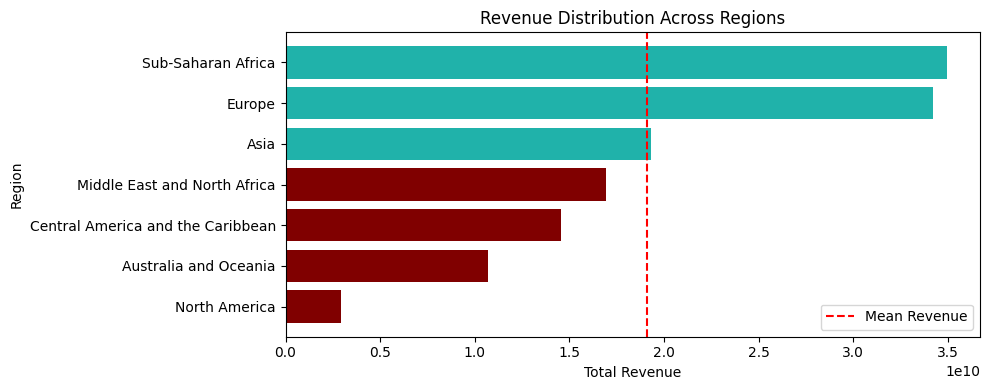

In [11]:
# Group the data by region and calculate the total revenue for each region
revenue_by_region = df.groupby('Region')['Total Revenue'].sum().reset_index()

# Sort the data by total revenue in ascending order
revenue_by_region = revenue_by_region.sort_values(by='Total Revenue')

# Calculate the mean total revenue across all regions
mean_revenue = revenue_by_region['Total Revenue'].mean()

# Create a horizontal bar plot of the revenue distribution, highlighting the bars above the mean
plt.figure(figsize=(10, 4))
for i, row in revenue_by_region.iterrows():
    if row['Total Revenue'] > mean_revenue:
        color = 'lightseagreen'  # Use a different color for bars above the mean
    else:
        color = 'maroon'  # Use a default color for bars below the mean
    plt.barh(row['Region'], row['Total Revenue'], color=color)

plt.title('Revenue Distribution Across Regions')
plt.xlabel('Total Revenue')
plt.ylabel('Region')
plt.axvline(x=mean_revenue, color='r', linestyle='--', label='Mean Revenue')
plt.legend()
plt.tight_layout()
plt.show()

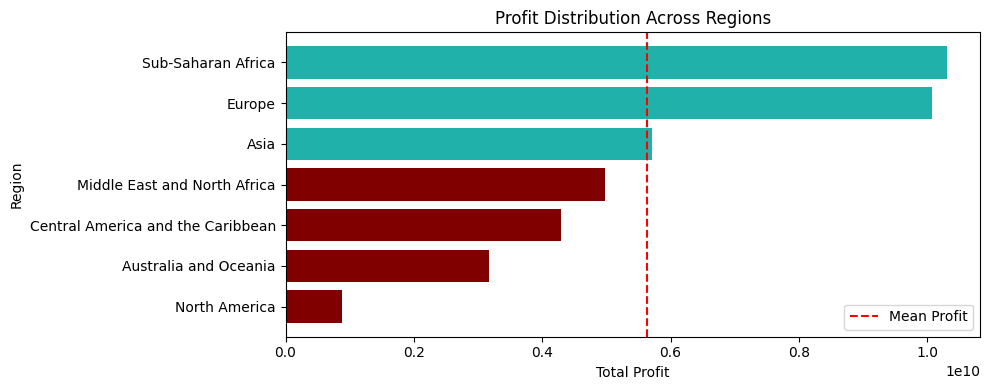

In [12]:
# Group the data by region and calculate the total profit for each region
profit_by_region = df.groupby('Region')['Total Profit'].sum().reset_index()

# Sort the data by total profit in ascending order
profit_by_region = profit_by_region.sort_values(by='Total Profit')

# Calculate the mean total profit across all regions
mean_profit = profit_by_region['Total Profit'].mean()

# Create a horizontal bar plot of the profit distribution, highlighting the bars above the mean
plt.figure(figsize=(10, 4))
for i, row in profit_by_region.iterrows():
    if row['Total Profit'] > mean_profit:
        color = 'lightseagreen'  # Use a different color for bars above the mean
    else:
        color = 'maroon'  # Use a default color for bars below the mean
    plt.barh(row['Region'], row['Total Profit'], color=color)

plt.title('Profit Distribution Across Regions')
plt.xlabel('Total Profit')
plt.ylabel('Region')
plt.axvline(x=mean_profit, color='r', linestyle='--', label='Mean Profit')
plt.legend()
plt.tight_layout()
plt.show()

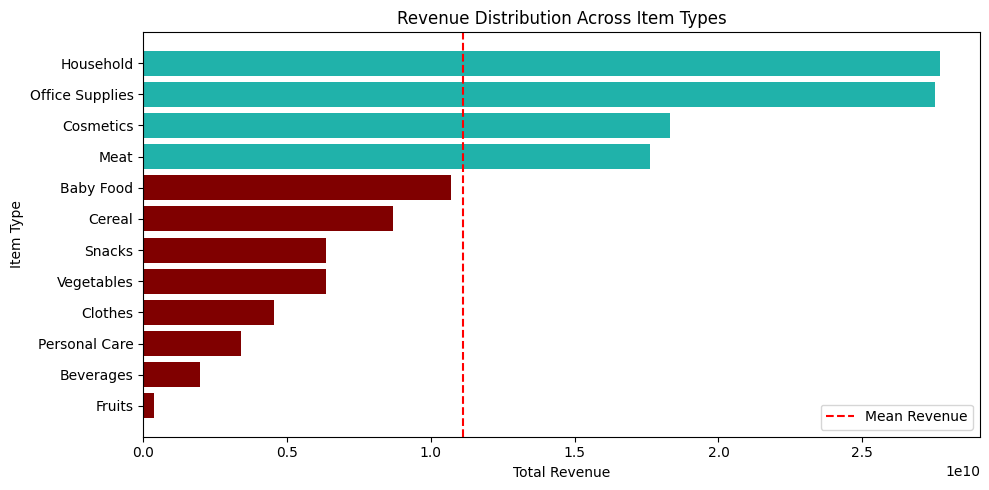

In [13]:
# Group the data by item type and calculate the total revenue for each item type
revenue_by_item_type = df.groupby('Item Type')['Total Revenue'].sum().reset_index()

# Sort the data by total revenue in ascending order
revenue_by_item_type = revenue_by_item_type.sort_values(by='Total Revenue')

# Calculate the mean total revenue across all item types
mean_revenue = revenue_by_item_type['Total Revenue'].mean()

# Create a horizontal bar plot of the profit distribution, highlighting the bars above the mean
plt.figure(figsize=(10, 5))
for i, row in revenue_by_item_type.iterrows():
    if row['Total Revenue'] > mean_revenue:
        color = 'lightseagreen'  # Use a different color for bars above the mean
    else:
        color = 'maroon'  # Use a default color for bars below the mean
    plt.barh(row['Item Type'], row['Total Revenue'], color=color)

plt.title('Revenue Distribution Across Item Types')
plt.xlabel('Total Revenue')
plt.ylabel('Item Type')
plt.axvline(x=mean_revenue, color='r', linestyle='--', label='Mean Revenue')
plt.legend()
plt.tight_layout()
plt.show()

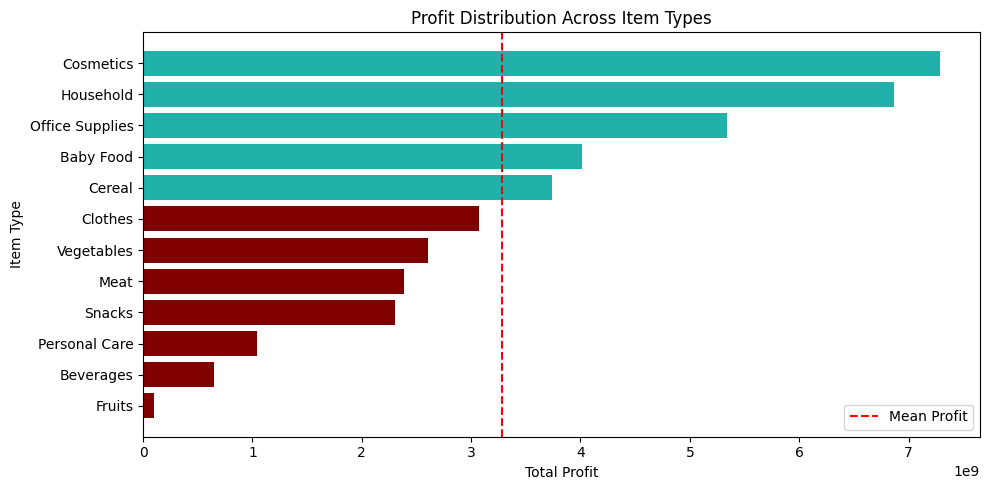

In [14]:
# Group the data by item type and calculate the total profit for each item type
profit_by_item_type = df.groupby('Item Type')['Total Profit'].sum().reset_index()

# Sort the data by total profit in ascending order
profit_by_item_type = profit_by_item_type.sort_values(by='Total Profit')

# Calculate the mean total profit across all item types
mean_profit = profit_by_item_type['Total Profit'].mean()

# Create a horizontal bar plot of the profit distribution, highlighting the bars above the mean
plt.figure(figsize=(10, 5))
for i, row in profit_by_item_type.iterrows():
    if row['Total Profit'] > mean_profit:
        color = 'lightseagreen'  # Use a different color for bars above the mean
    else:
        color = 'maroon'  # Use a default color for bars below the mean
    plt.barh(row['Item Type'], row['Total Profit'], color=color)

# Create a horizontal bar plot of the profit distribution
plt.title('Profit Distribution Across Item Types')
plt.xlabel('Total Profit')
plt.ylabel('Item Type')
plt.axvline(x=mean_profit, color='r', linestyle='--', label='Mean Profit')
plt.legend()
plt.tight_layout()
plt.show()

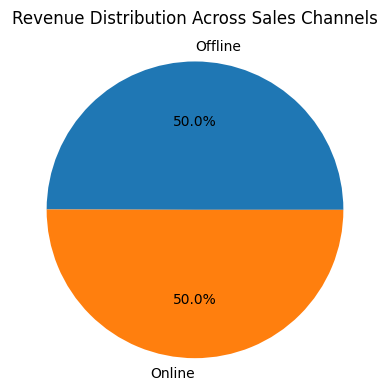

In [15]:
# Group the data by sales channel and calculate the total revenue for each sales channel
revenue_by_sales_channel = df.groupby('Sales Channel')['Total Revenue'].sum().reset_index()

# Create a pie chart of the revenue distribution
plt.figure(figsize=(4, 4))
plt.title('Revenue Distribution Across Sales Channels', y=1.05)
plt.pie(revenue_by_sales_channel['Total Revenue'], labels=revenue_by_sales_channel['Sales Channel'], autopct='%1.1f%%', colors=['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd'])
plt.axis('equal')
plt.tight_layout()
plt.show()

In [16]:
df['Sales Channel'].value_counts()

Sales Channel
Online     50054
Offline    49946
Name: count, dtype: int64

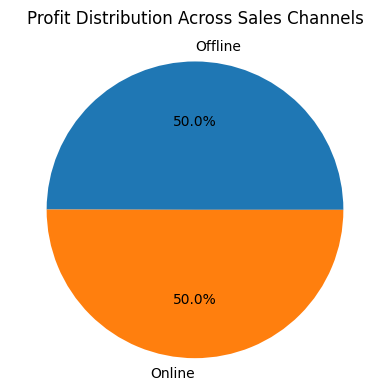

In [17]:
# Group the data by sales channel and calculate the total profit for each sales channel
profit_by_sales_channel = df.groupby('Sales Channel')['Total Profit'].sum().reset_index()

# Create a pie chart of the profit distribution
plt.figure(figsize=(4, 4))
plt.title('Profit Distribution Across Sales Channels', y=1.05)
plt.pie(profit_by_sales_channel['Total Profit'], labels=profit_by_sales_channel['Sales Channel'], autopct='%1.1f%%', colors=['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd'])
plt.axis('equal')
plt.tight_layout()
plt.show()

In [18]:
# Sort and print total revenue by region
print("Total revenue by region (sorted):")
for region, revenue in df.groupby('Region')['Total Revenue'].sum().sort_values(ascending=False).items():
    print(f"{region}: {revenue:,.2f}")
print()

# Sort and print total revenue by country
print("Total revenue by country (sorted):")
for country, revenue in df.groupby('Country')['Total Revenue'].sum().sort_values(ascending=False).items():
    print(f"{country}: {revenue:,.2f}")
print()

# Sort and print total revenue by item type
print("Total revenue by item type (sorted):")
for item_type, revenue in df.groupby('Item Type')['Total Revenue'].sum().sort_values(ascending=False).items():
    print(f"{item_type}: {revenue:,.2f}")
print()

# Sort and print total revenue by sales channel
print("Total revenue by sales channel (sorted):")
for channel, revenue in df.groupby('Sales Channel')['Total Revenue'].sum().sort_values(ascending=False).items():
    print(f"{channel}: {revenue:,.2f}")
print()

Total revenue by region (sorted):
Sub-Saharan Africa: 34,958,453,406.17
Europe: 34,241,150,923.39
Asia: 19,293,401,219.82
Middle East and North Africa: 16,921,412,794.52
Central America and the Caribbean: 14,553,730,165.29
Australia and Oceania: 10,701,522,223.73
North America: 2,937,002,333.49

Total revenue by country (sorted):
Hungary: 837,433,953.04
Bahrain: 835,302,930.87
Federated States of Micronesia: 832,669,517.08
Liberia: 816,786,910.88
Malta: 816,286,329.54
Sudan: 814,145,709.27
Marshall Islands: 810,251,011.36
Panama: 807,337,234.43
Yemen: 797,978,866.07
New Zealand: 793,897,933.11
Saint Vincent and the Grenadines: 792,567,740.00
Benin: 792,360,672.84
South Africa: 788,979,331.45
Mozambique: 788,837,241.43
Maldives: 788,329,775.82
Namibia: 785,270,772.87
Romania: 783,171,263.00
El Salvador: 782,277,970.30
Greenland: 781,864,792.04
Rwanda: 781,754,950.66
Haiti: 779,354,660.49
Ethiopia: 773,902,561.19
Lithuania: 773,438,637.16
Montenegro: 772,313,960.73
Cuba: 770,146,846.93
S

In [19]:
# Sort and print total profit by region
print("Total profit by region (sorted):")
for region, profit in df.groupby('Region')['Total Profit'].sum().sort_values(ascending=False).items():
    print(f"{region}: {profit:,.2f}")
print()

# Sort and print total profit by country
print("Total profit by country (sorted):")
for country, profit in df.groupby('Country')['Total Profit'].sum().sort_values(ascending=False).items():
    print(f"{country}: {profit:,.2f}")
print()

# Sort and print total profit by item type
print("Total profit by item type (sorted):")
for item_type, profit in df.groupby('Item Type')['Total Profit'].sum().sort_values(ascending=False).items():
    print(f"{item_type}: {profit:,.2f}")
print()

# Sort and print total profit by sales channel
print("Total profit by sales channel (sorted):")
for channel, profit in df.groupby('Sales Channel')['Total Profit'].sum().sort_values(ascending=False).items():
    print(f"{channel}: {profit:,.2f}")
print()

Total profit by region (sorted):
Sub-Saharan Africa: 10,306,312,642.23
Europe: 10,080,579,491.05
Asia: 5,707,511,516.76
Middle East and North Africa: 4,979,534,378.88
Central America and the Caribbean: 4,287,210,522.47
Australia and Oceania: 3,175,423,561.38
North America: 872,551,616.84

Total profit by country (sorted):
Sudan: 249,523,548.61
Hungary: 241,860,844.00
Federated States of Micronesia: 241,045,260.27
Liberia: 239,114,337.44
Australia: 238,598,455.81
Benin: 238,294,599.69
New Zealand: 237,880,635.77
Bahrain: 237,638,193.15
Marshall Islands: 236,922,446.07
Malta: 234,376,855.95
Saint Vincent and the Grenadines: 234,123,756.37
Greenland: 233,125,605.54
Mozambique: 233,094,185.78
Panama: 232,216,299.51
Saint Kitts and Nevis : 231,481,945.68
El Salvador: 231,463,892.10
Macedonia: 230,278,294.78
Yemen: 229,597,166.05
Turkmenistan: 229,571,216.74
South Africa: 228,493,299.91
Tanzania: 228,274,307.54
Namibia: 228,008,246.65
Rwanda: 227,933,581.38
India: 227,898,713.14
South Sudan:

In [20]:
# Sort and print total cost by region
print("Total cost by region (sorted):")
for region, cost in df.groupby('Region')['Total Cost'].sum().sort_values(ascending=False).items():
    print(f"{region}: {cost:,.2f}")
print()

# Sort and print total cost by country
print("Total cost by country (sorted):")
for country, cost in df.groupby('Country')['Total Cost'].sum().sort_values(ascending=False).items():
    print(f"{country}: {cost:,.2f}")
print()

# Sort and print total cost by item type
print("Total cost by item type (sorted):")
for item_type, cost in df.groupby('Item Type')['Total Cost'].sum().sort_values(ascending=False).items():
    print(f"{item_type}: {cost:,.2f}")
print()

# Sort and print total cost by sales channel
print("Total cost by sales channel (sorted):")
for channel, cost in df.groupby('Sales Channel')['Total Cost'].sum().sort_values(ascending=False).items():
    print(f"{channel}: {cost:,.2f}")
print()

Total cost by region (sorted):
Sub-Saharan Africa: 24,652,140,763.94
Europe: 24,160,571,432.34
Asia: 13,585,889,703.06
Middle East and North Africa: 11,941,878,415.64
Central America and the Caribbean: 10,266,519,642.82
Australia and Oceania: 7,526,098,662.35
North America: 2,064,450,716.65

Total cost by country (sorted):
Bahrain: 597,664,737.72
Hungary: 595,573,109.04
Federated States of Micronesia: 591,624,256.81
Malta: 581,909,473.59
Liberia: 577,672,573.44
Panama: 575,120,934.92
Marshall Islands: 573,328,565.29
Yemen: 568,381,700.02
Maldives: 565,647,389.33
Sudan: 564,622,160.66
South Africa: 560,486,031.54
Romania: 559,202,776.77
Saint Vincent and the Grenadines: 558,443,983.63
Namibia: 557,262,526.22
New Zealand: 556,017,297.34
Mozambique: 555,743,055.65
Benin: 554,066,073.15
Haiti: 553,851,977.71
Rwanda: 553,821,369.28
Ethiopia: 551,680,846.64
Cuba: 551,120,550.80
El Salvador: 550,814,078.20
Lithuania: 550,375,433.12
Montenegro: 549,730,500.47
Greenland: 548,739,186.50
Mexico: 

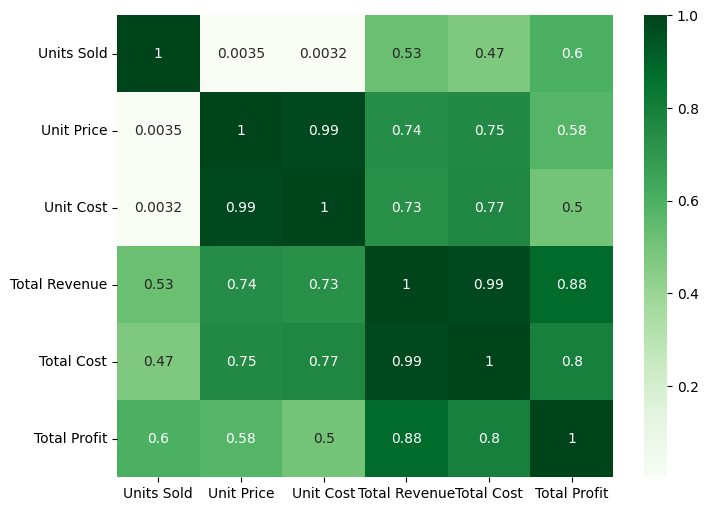

In [21]:
# Tính toán ma trận tương quan
corr_matrix = df[['Units Sold', 'Unit Price', 'Unit Cost', 'Total Revenue', 'Total Cost', 'Total Profit']].corr()

# Vẽ biểu đồ tương quan
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot = True, cmap = 'Greens')
plt.show()

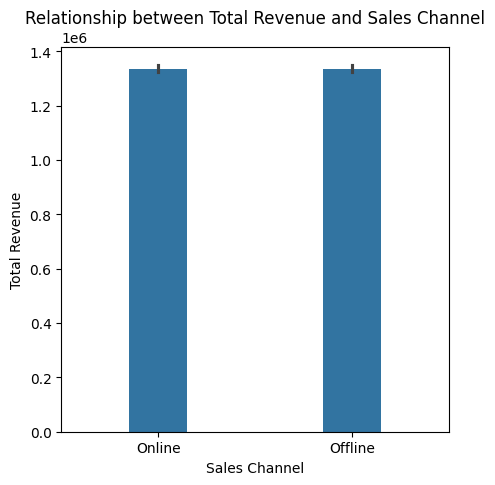

In [22]:
# Vẽ biểu đồ cột
plt.figure(figsize=(5, 5))
sns.barplot(x='Sales Channel', y='Total Revenue', data=df, width=0.3)
plt.xlabel('Sales Channel')
plt.ylabel('Total Revenue')
plt.title('Relationship between Total Revenue and Sales Channel')
plt.show()

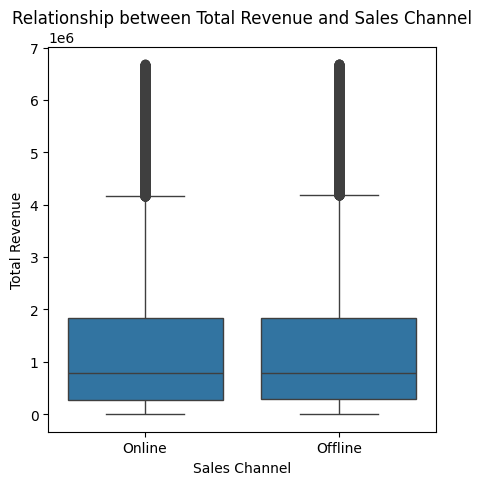

In [23]:
# Vẽ biểu đồ box plot
plt.figure(figsize=(5, 5))
sns.boxplot(x='Sales Channel', y='Total Revenue', data=df)
plt.xlabel('Sales Channel')
plt.ylabel('Total Revenue')
plt.title('Relationship between Total Revenue and Sales Channel')
plt.show()

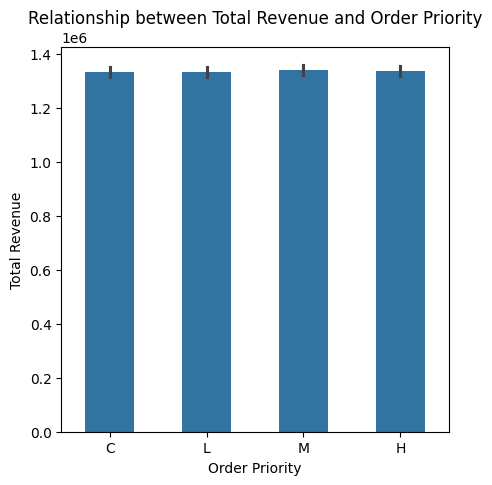

In [24]:
plt.figure(figsize=(5, 5))
sns.barplot(x='Order Priority', y='Total Revenue', data=df, width=0.5)
plt.xlabel('Order Priority')
plt.ylabel('Total Revenue')
plt.title('Relationship between Total Revenue and Order Priority')
plt.show()

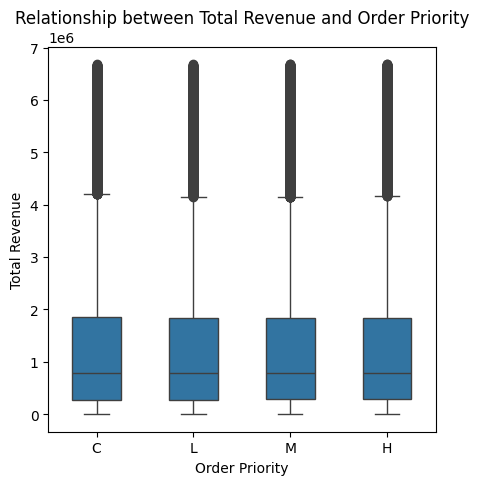

In [25]:
plt.figure(figsize=(5, 5))
sns.boxplot(x='Order Priority', y='Total Revenue', data=df, width=0.5)
plt.xlabel('Order Priority')
plt.ylabel('Total Revenue')
plt.title('Relationship between Total Revenue and Order Priority')
plt.show()

In [26]:
df['Order Date'] = pd.to_datetime(df['Order Date'])
df['Ship Date'] = pd.to_datetime(df['Ship Date'])

In [27]:
df['Order Weekday'] = df['Order Date'].dt.day_name()
df['Ship Weekday'] = df['Ship Date'].dt.day_name()

In [28]:
df

,Region,Country,Item Type,Sales Channel,Order Priority,Order Date,Order ID,Ship Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit,Order Weekday,Ship Weekday
0,Middle East and North Africa,Azerbaijan,Snacks,Online,C,2014-10-08,535113847,2014-10-23,934,152.58,97.44,142509.72,91008.96,51500.76,Wednesday,Thursday
1,Central America and the Caribbean,Panama,Cosmetics,Offline,L,2015-02-22,874708545,2015-02-27,4551,437.20,263.33,1989697.20,1198414.83,791282.37,Sunday,Friday
2,Sub-Saharan Africa,Sao Tome and Principe,Fruits,Offline,M,2015-12-09,854349935,2016-01-18,9986,9.33,6.92,93169.38,69103.12,24066.26,Wednesday,Monday
3,Sub-Saharan Africa,Sao Tome and Principe,Personal Care,Online,M,2014-09-17,892836844,2014-10-12,9118,81.73,56.67,745214.14,516717.06,228497.08,Wednesday,Sunday
4,Central America and the Caribbean,Belize,Household,Offline,H,2010-02-04,129280602,2010-03-05,5858,668.27,502.54,3914725.66,2943879.32,970846.34,Thursday,Friday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,Sub-Saharan Africa,Niger,Cereal,Offline,L,2012-08-26,836322486,2012-09-11,5263,205.70,117.11,1082599.10,616349.93,466249.17,Sunday,Tuesday
99996,Europe,Poland,Meat,Offline,C,2013-12-03,110449349,2013-12-10,3272,421.89,364.69,1380424.08,1193265.68,187158.40,Tuesday,Tuesday
99997,Sub-Saharan Africa,Comoros,Clothes,Online,M,2013-08-07,193128764,2013-08-31,9948,109.28,35.84,1087117.44,356536.32,730581.12,Wednesday,Saturday
99998,Middle East and North Africa,Kuwait,Cosmetics,Online,L,2011-06-28,701597058,2011-07-03,7015,437.20,263.33,3066958.00,1847259.95,1219698.05,Tuesday,Sunday


In [29]:
df['Order Weekday Number'] = df['Order Date'].dt.weekday + 1
df['Ship Weekday Number'] = df['Ship Date'].dt.weekday + 1

In [30]:
df

,Region,Country,Item Type,Sales Channel,Order Priority,Order Date,Order ID,Ship Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit,Order Weekday,Ship Weekday,Order Weekday Number,Ship Weekday Number
0,Middle East and North Africa,Azerbaijan,Snacks,Online,C,2014-10-08,535113847,2014-10-23,934,152.58,97.44,142509.72,91008.96,51500.76,Wednesday,Thursday,3,4
1,Central America and the Caribbean,Panama,Cosmetics,Offline,L,2015-02-22,874708545,2015-02-27,4551,437.20,263.33,1989697.20,1198414.83,791282.37,Sunday,Friday,7,5
2,Sub-Saharan Africa,Sao Tome and Principe,Fruits,Offline,M,2015-12-09,854349935,2016-01-18,9986,9.33,6.92,93169.38,69103.12,24066.26,Wednesday,Monday,3,1
3,Sub-Saharan Africa,Sao Tome and Principe,Personal Care,Online,M,2014-09-17,892836844,2014-10-12,9118,81.73,56.67,745214.14,516717.06,228497.08,Wednesday,Sunday,3,7
4,Central America and the Caribbean,Belize,Household,Offline,H,2010-02-04,129280602,2010-03-05,5858,668.27,502.54,3914725.66,2943879.32,970846.34,Thursday,Friday,4,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,Sub-Saharan Africa,Niger,Cereal,Offline,L,2012-08-26,836322486,2012-09-11,5263,205.70,117.11,1082599.10,616349.93,466249.17,Sunday,Tuesday,7,2
99996,Europe,Poland,Meat,Offline,C,2013-12-03,110449349,2013-12-10,3272,421.89,364.69,1380424.08,1193265.68,187158.40,Tuesday,Tuesday,2,2
99997,Sub-Saharan Africa,Comoros,Clothes,Online,M,2013-08-07,193128764,2013-08-31,9948,109.28,35.84,1087117.44,356536.32,730581.12,Wednesday,Saturday,3,6
99998,Middle East and North Africa,Kuwait,Cosmetics,Online,L,2011-06-28,701597058,2011-07-03,7015,437.20,263.33,3066958.00,1847259.95,1219698.05,Tuesday,Sunday,2,7


In [31]:
df.groupby('Order Weekday Number')['Total Revenue'].mean()

Order Weekday Number
1    1.340955e+06
2    1.335788e+06
3    1.330716e+06
4    1.344562e+06
5    1.329411e+06
6    1.343744e+06
7    1.327324e+06
Name: Total Revenue, dtype: float64

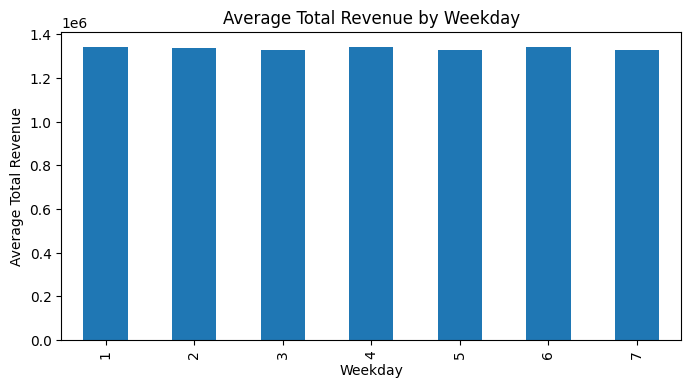

In [32]:
plt.figure(figsize=(8, 4))
df.groupby('Order Weekday Number')['Total Revenue'].mean().plot(kind='bar')
plt.xlabel('Weekday')
plt.ylabel('Average Total Revenue')
plt.title('Average Total Revenue by Weekday')
plt.show()

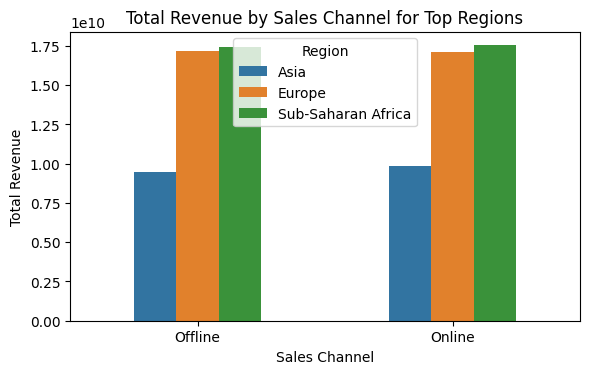

In [33]:
# Filter the data to include only the specified regions
regions = ['Sub-Saharan Africa', 'Europe', 'Asia']
region_data = df[df['Region'].isin(regions)]
region_data = region_data.groupby(['Region', 'Sales Channel'])['Total Revenue'].sum().reset_index()
region_data = region_data.sort_values(by='Total Revenue')

# Create a figure and axis objects
fig, ax = plt.subplots(figsize=(6, 4))

# Plot the total revenue by sales channel for each region
sns.barplot(x='Sales Channel', y='Total Revenue', hue='Region', data=region_data, ax=ax, width=0.5)

# Set the title and axis labels
ax.set_title('Total Revenue by Sales Channel for Top Regions')
ax.set_xlabel('Sales Channel')
ax.set_ylabel('Total Revenue')

# Adjust the layout to make it look nicer
plt.tight_layout()
plt.show()

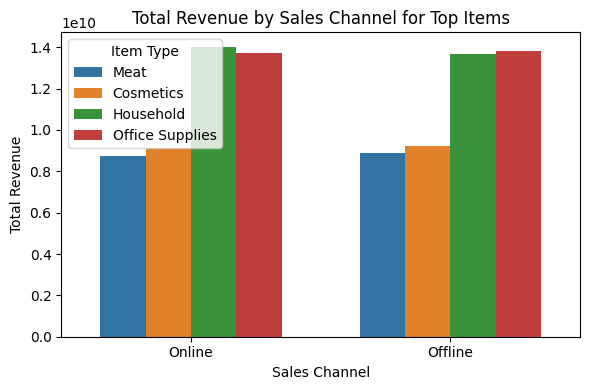

In [34]:
# Filter the data to include only the specified regions
items = ['Household', 'Office Supplies', 'Cosmetics', 'Meat']
items_data = df[df['Item Type'].isin(items)]
items_data = items_data.groupby(['Item Type', 'Sales Channel'])['Total Revenue'].sum().reset_index()
items_data = items_data.sort_values(by='Total Revenue')

# Create a figure and axis objects
fig, ax = plt.subplots(figsize=(6, 4))

# Plot the total revenue by sales channel for each region
sns.barplot(x='Sales Channel', y='Total Revenue', hue='Item Type', data=items_data, ax=ax, width=0.7)

# Set the title and axis labels
ax.set_title('Total Revenue by Sales Channel for Top Items')
ax.set_xlabel('Sales Channel')
ax.set_ylabel('Total Revenue')

# Adjust the layout to make it look nicer
plt.tight_layout()
plt.show()

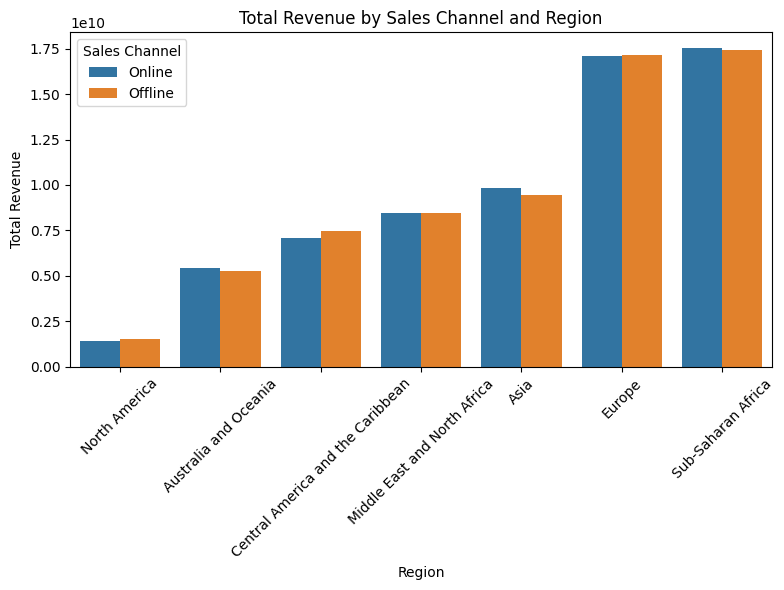

In [35]:
# Assuming your dataset is named 'df'
total_revenue_region = df.groupby(['Region', 'Sales Channel'])['Total Revenue'].sum().reset_index()

# Sort the data by total revenue in ascending order
total_revenue_region = total_revenue_region.sort_values(by='Total Revenue')

# Visualize the units sold based on region and item type
plt.figure(figsize=(8, 6))
sns.barplot(x='Region', y='Total Revenue', hue='Sales Channel', data=total_revenue_region)
plt.title('Total Revenue by Sales Channel and Region')
plt.xlabel('Region')
plt.ylabel('Total Revenue')
plt.xticks(rotation=45)
plt.tight_layout()

# Show the plot
plt.show()

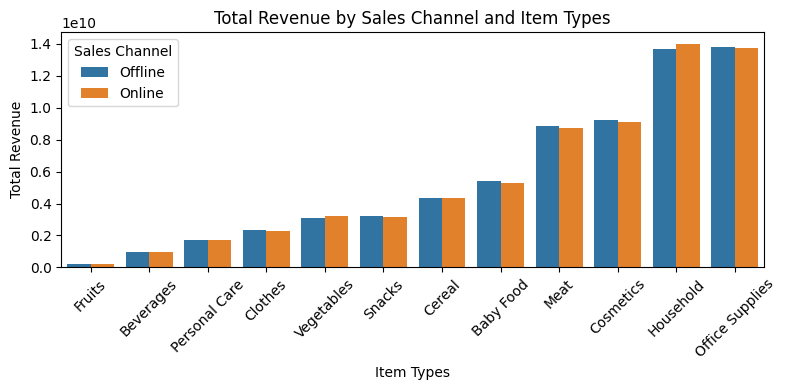

In [36]:
# Assuming your dataset is named 'df'
total_revenue_item = df.groupby(['Item Type', 'Sales Channel'])['Total Revenue'].sum().reset_index()

# Sort the data by total revenue in ascending order
total_revenue_item = total_revenue_item.sort_values(by='Total Revenue')

# Visualize the units sold based on region and item type
plt.figure(figsize=(8, 4))
sns.barplot(x='Item Type', y='Total Revenue', hue='Sales Channel', data=total_revenue_item)
plt.title('Total Revenue by Sales Channel and Item Types')
plt.xlabel('Item Types')
plt.ylabel('Total Revenue')
plt.xticks(rotation=45)
plt.tight_layout()

# Show the plot
plt.show()